In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score
import seaborn as sns

%matplotlib inline
sns.set()

In [2]:
path="D:\\Projects\\Data\\Titanic\\titanic"

In [3]:
#imoprt test and train datasets
df_train=pd.read_csv(path+"\\train.csv")
df_test=pd.read_csv(path+"\\test.csv")

In [4]:
df_train_ml=df_train.copy()
df_test_ml=df_test.copy()

In [5]:
#pandas get_dummies for categorical features
df_train_ml = pd.get_dummies(df_train_ml, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)


In [6]:
df_train_ml.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,1,0,0
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,0,1,0,1


In [7]:
df_train_ml.drop(['PassengerId','Name','Ticket', 'Cabin'],axis=1,inplace=True)


In [8]:
df_train_ml.head()

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


In [9]:
df_train_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived      891 non-null int64
Age           714 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Sex_male      891 non-null uint8
Embarked_Q    891 non-null uint8
Embarked_S    891 non-null uint8
Pclass_2      891 non-null uint8
Pclass_3      891 non-null uint8
dtypes: float64(2), int64(3), uint8(5)
memory usage: 39.2 KB


In [10]:
df_train_ml.dropna(inplace=True)

In [11]:
df_train_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 10 columns):
Survived      714 non-null int64
Age           714 non-null float64
SibSp         714 non-null int64
Parch         714 non-null int64
Fare          714 non-null float64
Sex_male      714 non-null uint8
Embarked_Q    714 non-null uint8
Embarked_S    714 non-null uint8
Pclass_2      714 non-null uint8
Pclass_3      714 non-null uint8
dtypes: float64(2), int64(3), uint8(5)
memory usage: 37.0 KB


In [12]:
passenger_id = df_test_ml['PassengerId']
df_test_ml = pd.get_dummies(df_test_ml, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)
df_test_ml.drop(['PassengerId','Name','Ticket', 'Cabin'],axis=1,inplace=True)

In [13]:
df_test_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
Age           332 non-null float64
SibSp         418 non-null int64
Parch         418 non-null int64
Fare          417 non-null float64
Sex_male      418 non-null uint8
Embarked_Q    418 non-null uint8
Embarked_S    418 non-null uint8
Pclass_2      418 non-null uint8
Pclass_3      418 non-null uint8
dtypes: float64(2), int64(2), uint8(5)
memory usage: 15.2 KB


In [14]:
#find correlations
corr=df_train_ml.corr()


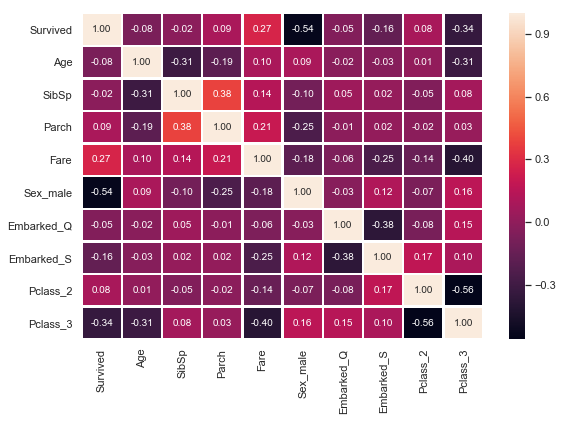

In [18]:
f,ax=plt.subplots(figsize=(9,6))
sns.heatmap(corr,annot=True,ax=ax,linewidths=1.5,fmt='.2f')

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scalar=StandardScaler()

In [27]:
scalar.fit(df_train_ml.drop('Survived',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [28]:
scaled_features=scalar.transform(df_train_ml.drop('Survived',axis=1))

In [29]:
df_train_ml_sc=pd.DataFrame(scaled_features,columns=df_train_ml.columns[:-1])

In [30]:
df_train_ml_sc.head()

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2
0,-0.530377,0.524570,-0.505895,-0.518978,0.759051,-0.202031,0.537409,-0.565489,1.005618
1,0.571831,0.524570,-0.505895,0.691897,-1.317434,-0.202031,-1.860779,-0.565489,-0.994413
2,-0.254825,-0.551703,-0.505895,-0.506214,-1.317434,-0.202031,0.537409,-0.565489,1.005618
3,0.365167,0.524570,-0.505895,0.348049,-1.317434,-0.202031,0.537409,-0.565489,-0.994413
4,0.365167,-0.551703,-0.505895,-0.503850,0.759051,-0.202031,0.537409,-0.565489,1.005618


In [31]:
#for test Ml data
#fill missiing values, replaced with mean value
df_test_ml.fillna(df_test_ml.mean(),inplace=True)

In [32]:
scaled_features_testML=scalar.transform(df_test_ml)

In [33]:
df_test_ml_sc=pd.DataFrame(scaled_features_testML,columns=df_test_ml.columns)

In [34]:
df_test_ml_sc.head()

,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0.330723,-0.551703,-0.505895,-0.508025,0.759051,4.949747,-1.860779,-0.565489,1.005618
1,1.191823,0.524570,-0.505895,-0.523705,-1.317434,-0.202031,0.537409,-0.565489,1.005618
2,2.225142,-0.551703,-0.505895,-0.472885,0.759051,4.949747,-1.860779,1.768380,-0.994413
3,-0.185937,-0.551703,-0.505895,-0.492267,0.759051,-0.202031,0.537409,-0.565489,1.005618
4,-0.530377,0.524570,0.666862,-0.423718,-1.317434,-0.202031,0.537409,-0.565489,1.005618


In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train,X_test,Y_train,Y_test=train_test_split(df_train_ml.drop('Survived',axis=1),df_train_ml['Survived'],test_size=0.30,random_state=101)

In [38]:
X_train_sc,X_test_sc,Y_train_sc,Y_test_sc=train_test_split(df_train_ml_sc,df_train_ml['Survived'],test_size=0.30,random_state=101)

In [39]:
#all data submission
# unscaled
X_train_all = df_train_ml.drop('Survived',axis=1)
y_train_all = df_train_ml['Survived']
X_test_all = df_test_ml

# scaled
X_train_all_sc = df_train_ml_sc
y_train_all_sc = df_train_ml['Survived']
X_test_all_sc = df_test_ml_sc

In [40]:
X_test_all.fillna(X_test_all.mean(), inplace=True)

In [41]:
#Scikit-learn basic ML algorithms and comparison of model results
'''1.Logistic regression
2 Gaussian Naive Bayes
3 K nearest neighbors KNN
4 Decision tree classifier
5 Random forest classifier
6 SVM classifier'''

'1.Logistic regression\n2 Gaussian Naive Bayes\n3 K nearest neighbors KNN\n4 Decision tree classifier\n5 Random forest classifier\n6 SVM classifier'

In [42]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
'''For comparison of the results we use these metrics:
accuracy_score, classification_report, confusion_matrix'''

'For comparison of the results we use these metrics:\naccuracy_score, classification_report, confusion_matrix'

In [41]:
#confusion matrix
#The rows of a confusion matrix correspond to the true (actual) classes and the columns correspond to the predicted classes.
'''
TN: True negatives (prediction: not survived, true: not survived)
FP: False positives (prediction: survived, true: not survived)
FN: False negatives (prediction: not survived, true: survived)
TP: True positives (prediction: survived, true: survived)
'''

'\nTN: True negatives (prediction: not survived, true: not survived)\nFP: False positives (prediction: survived, true: not survived)\nFN: False negatives (prediction: not survived, true: survived)\nTP: True positives (prediction: survived, true: survived)\n'

In [43]:
#accuracy score
'''
classification accuracy = correct predictions / total predictions = (TP + TN) / (TP + TN + FP + FN)
'''

'\nclassification accuracy = correct predictions / total predictions = (TP + TN) / (TP + TN + FP + FN)\n'

In [44]:
#classification report
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html 
'''
The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important.

The support is the number of occurrences of each class in y_true.

precision recall f1-score support
'''

'\nThe precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.\n\nThe recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.\n\nThe F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.\n\nThe F-beta score weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important.\n\nThe support is the number of occurrences of each class in y_true.\n\nprecision recall f1-score support\n'

In [45]:
#Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression


In [44]:
logModel=LogisticRegression()
logModel.fit(X_train,Y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [45]:
logModelPredictions=logModel.predict(X_test)

In [46]:
print(confusion_matrix(Y_test,logModelPredictions))

[[107  16]
 [ 32  60]]


In [47]:
print(classification_report(Y_test,logModelPredictions))

             precision    recall  f1-score   support

          0       0.77      0.87      0.82       123
          1       0.79      0.65      0.71        92

avg / total       0.78      0.78      0.77       215



In [48]:
print(accuracy_score(Y_test,logModelPredictions))

0.7767441860465116


In [49]:
#training for all data
logModel.fit(X_train_all, y_train_all)
pred_all_logreg = logModel.predict(X_test_all)

In [57]:
sub_logreg = pd.DataFrame()
sub_logreg['PassengerId'] = df_test['PassengerId']
sub_logreg['Survived'] = pred_all_logreg
sub_logreg.to_csv(path+'\\logisticmodel.csv',index=False)

In [58]:
#Gaussian Naive Bayes

In [50]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train,Y_train)
pred_gnb = gnb.predict(X_test)
print(confusion_matrix(Y_test, pred_gnb))
print(classification_report(Y_test, pred_gnb))
print(accuracy_score(Y_test, pred_gnb))

[[107  16]
 [ 36  56]]
             precision    recall  f1-score   support

          0       0.75      0.87      0.80       123
          1       0.78      0.61      0.68        92

avg / total       0.76      0.76      0.75       215

0.7581395348837209


In [51]:
#KNN - KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train_sc,Y_train_sc)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform')

In [52]:
pred_knn = knn.predict(X_test)
print(confusion_matrix(Y_test, pred_knn))
print(classification_report(Y_test, pred_knn))
print(accuracy_score(Y_test, pred_knn))

[[71 52]
 [26 66]]
             precision    recall  f1-score   support

          0       0.73      0.58      0.65       123
          1       0.56      0.72      0.63        92

avg / total       0.66      0.64      0.64       215

0.6372093023255814


In [64]:
knn.fit(X_train_all, y_train_all)
pred_all_knn = knn.predict(X_test_all)

sub_knn = pd.DataFrame()
sub_knn['PassengerId'] = df_test['PassengerId']
sub_knn['Survived'] = pred_all_knn
sub_knn.to_csv(path+'\\knn.csv',index=False)

In [53]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [54]:
pred_dtree = dtree.predict(X_test)
print(classification_report(Y_test,pred_dtree))
print(accuracy_score(Y_test, pred_dtree))

             precision    recall  f1-score   support

          0       0.76      0.84      0.80       123
          1       0.75      0.65      0.70        92

avg / total       0.76      0.76      0.76       215

0.7581395348837209


In [55]:
dtree_2 = DecisionTreeClassifier(max_features=7 , max_depth=6,  min_samples_split=8)
dtree_2.fit(X_train,Y_train)
pred_dtree_2 = dtree_2.predict(X_test)
print(classification_report(Y_test, pred_dtree_2))
print(accuracy_score(Y_test, pred_dtree_2))

             precision    recall  f1-score   support

          0       0.79      0.89      0.84       123
          1       0.83      0.67      0.74        92

avg / total       0.80      0.80      0.80       215

0.8


In [69]:
dtree_2.fit(X_train_all, y_train_all)
pred_all_dtree2 = dtree_2.predict(X_test_all)

In [56]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=6, max_features=7)
rfc.fit(X_train, Y_train)

C:\Users\M1046091\AppData\Local\Continuum\anaconda3\envs\condaOpenCV\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features=7, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [57]:
pred_rfc = rfc.predict(X_test)
print(confusion_matrix(Y_test, pred_rfc))
print(classification_report(Y_test, pred_rfc))
print(accuracy_score(Y_test, pred_rfc))

[[110  13]
 [ 35  57]]
             precision    recall  f1-score   support

          0       0.76      0.89      0.82       123
          1       0.81      0.62      0.70        92

avg / total       0.78      0.78      0.77       215

0.7767441860465116


In [72]:
rfc.fit(X_train_all, y_train_all)
pred_all_rfc = rfc.predict(X_test_all)

In [73]:
sub_rfc = pd.DataFrame()
sub_rfc['PassengerId'] = df_test['PassengerId']
sub_rfc['Survived'] = pred_all_rfc
sub_rfc.to_csv(path+'\\randforest.csv',index=False)

In [58]:
#SVM Classifier
from sklearn.svm import SVC
svc = SVC(gamma = 0.01, C = 100)#, probability=True)
svc.fit(X_train_sc, Y_train_sc)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [59]:
pred_svc = svc.predict(X_test_sc)
print(confusion_matrix(Y_test_sc, pred_svc))
print(classification_report(Y_test_sc, pred_svc))
print(accuracy_score(Y_test_sc, pred_svc))

[[116   7]
 [ 34  58]]
             precision    recall  f1-score   support

          0       0.77      0.94      0.85       123
          1       0.89      0.63      0.74        92

avg / total       0.82      0.81      0.80       215

0.8093023255813954


In [78]:
svc.fit(X_train_all_sc, y_train_all_sc)
pred_all_svc = svc.predict(X_test_all_sc)

sub_svc = pd.DataFrame()
sub_svc['PassengerId'] = df_test['PassengerId']
sub_svc['Survived'] = pred_all_svc
sub_svc.to_csv(path+'\\svm.csv',index=False)

In [79]:
#k fold cross_validation
'''
This algorithm splits the data into k sets and then makes k fits using every set k-1 times as training and one time as test data
It leads to a better estimate for out of sample data than simple train test split
'''

'\nThis algorithm splits the data into k sets and then makes k fits using every set k-1 times as training and one time as test data\nIt leads to a better estimate for out of sample data than simple train test split\n'

In [60]:
from sklearn.model_selection import cross_val_score

In [62]:
#svm
scores_svc = cross_val_score(svc, X_train_all_sc, y_train_all_sc, cv=10, scoring='accuracy')
print(scores_svc)
print(scores_svc.mean())

[0.81944444 0.80555556 0.76388889 0.875      0.81690141 0.8028169
 0.8028169  0.73239437 0.88732394 0.84507042]
0.8151212832550861


In [63]:
#random forest
scores_rfc = cross_val_score(rfc, X_train_all_sc, y_train_all_sc, cv=10, scoring='accuracy')
print(scores_rfc)
print(scores_rfc.mean())

[0.76388889 0.79166667 0.76388889 0.90277778 0.83098592 0.8028169
 0.83098592 0.73239437 0.87323944 0.85915493]
0.8151799687010953


In [64]:
#decission tree
scores_dtree_2 = cross_val_score(dtree_2, X_train_all_sc, y_train_all_sc, cv=10, scoring='accuracy')
print(scores_dtree_2)
print(scores_dtree_2.mean())

[0.69444444 0.76388889 0.75       0.88888889 0.83098592 0.81690141
 0.81690141 0.78873239 0.8028169  0.8028169 ]
0.7956377151799687


In [65]:
print("dtree_2 : " , scores_dtree_2.mean())
print("rfc     : " , scores_rfc.mean())
print("svc     : " , scores_svc.mean())

dtree_2 :  0.7956377151799687
rfc     :  0.8151799687010953
svc     :  0.8151212832550861
